# Introdução

O projeto aqui desenvolvido tem como objetivo realizar previsões de qual time vencedor de determinadas partidas do jogo "League of Legends" (LoL). Através do uso de diferentes modelos de classificação de Machine Learning, os algoritmos receberão informações e valores estatísticos sobre aspectos e elementos distintos de várias sessões do jogo, registradas em uma base de dados em um arquivo CSV, para alcançar esse objetivo. O projeto está separado em 4 partes principais, sendo elas:

* **Análise Exploratória dos Dados (EDA)**: Primeira etapa, que consiste em carregar os dados, entendê-los, alterá-los ou realizar correções iniciais para valores incorretos ou nulos, bem como o tratamento de "outliers"

* **Pré-Processamento**: Segunda etapa, consiste em analisar a correlação dos dados, determinar quais variáveis aparentam maior importância para o projeto, padronização dos dados, redução de dimensionalidade, além da separação das variáveis independentes da variável alvo e, em seguida, a separação em bases de treino e teste, juntamente com a checagem de balanceamento das possíveis classes da base de treino

* **Modelagem**: Terceira etapa, onde são criadas as instâncias dos modelos de aprendizado de máquina para atingir o objetivo do projeto, estabelecendo hiperparâmetros para otimizar resultados, treinando e ensinado os algoritmos com os dados já pré-processados e, enfim, a realização de previsões com dados inéditos

* **Avaliação**: A última etapa, em que são utilizadas diferentes métricas confiáveis para analisar o desempenho dos modelos e entender quais apresentaram melhores resultados e as dificuldades que cada um teve

Tendo estabelecido essa ordem para alcançar o objetivo principal, é importante compreender previamente o significado de cada variável da base de dados para evitar confusões futuras:

* **gameId**: ID do jogo, ou seja, código que identifica a partida para preservar suas informações

* **blueWardsPlaced/redWardsPlaced**: Número de sentinelas colocadas pelo time

* **blueWardsDestroyed/redWardsDestroyed**: Número de sentinela destruídas pelo time

* **blueFirstBlood/redFirstBlood**: Indica se o time azul teve ou não a primeira eliminação da partida. 0 = Não, 1 = Sim

* **blueKills/redKills**: Eliminações totais do time

* **blueDeaths/redDeaths**: Mortes totais do time

* **blueAssists/redAssists**: Assistências totais de eliminações obtidas pelo time  

* **blueEliteMonsters/redEliteMonsters**: Monstros épicos derrotados (adquiridos) pelo time

* **blueDragons/redDragons**: Número de dragões derrotados (adquiridos) pelo time

* **blueHeralds/redHeralds**: Número de arautos do vale derrotados (adquiridos) pelo time

* **blueTowersDestroyed/redTowersDestroyed**: Número de torres destruídas

* **blueTotalGold/redTotalGold**: Quantidade total de ouro acumulado pelo time

* **blueAvgLevel/redAvgLevel**: Nível médio dos campeões/jogadores do time

* **blueTotalExperience/redTotalExperience**: Quantidade de experiência adquirida pelo time

* **blueTotalMinionsKilled/redTotalMinionsKilled**: Total de minions eliminados pelo time

* **blueTotalJungleMinionsKilled/redTotalJungleMinionsKilled**: Total de minions da floresta eliminados pelo time

* **blueGoldDiff/redGoldDiff**: A diferença de ouro do time para o outro (Um número negativo indica que o time possuí menos ouro)

* **blueExperienceDiff/redExperienceDiff**: A diferença de experiência do time para o outro (Um número negativo indica que o time possuí menos experiência)

* **blueCSPerMin/redCSPerMin**: Taxa de minions eliminados por minuto

* **blueGoldPerMin/redGoldPerMin**: Taxa de ouro adquirido por minuto

##### Variável Alvo:
* **blueWins**: Indica se o time azul venceu ou não. 0 = Não (Vitória Vermelha), 1 = Sim (Vitória Azul)

## Importações

In [1]:
# Importações de bibliotecas para manipulação e visualização de dados

import pandas as pd  # Importa pandas para manipulação de dados
import seaborn as sns # Importa seaborn para visualização de dados
import numpy as np # Importa numpy para operações numéricas
import plotly.express as px # Importa plotly para visualização interativa
import matplotlib.pyplot as plt # Importa matplotlib para visualização de dados
import plotly.graph_objects as go # Importa plotly.graph_objects para visualizações mais complexas
import plotly.figure_factory as ff # Importa figure_factory para criar gráficos personalizados
from plotly.subplots import make_subplots # Importa make_subplots para criar subplots em plotly

# Importações de modelos de machine learning

import xgboost as xgb # Importa XGBoost para modelos de boosting
from sklearn.svm import SVC # Importa SVC para máquinas de vetores de suporte
from sklearn.linear_model import LogisticRegression # Importa regressão logística
from sklearn.ensemble import RandomForestClassifier # Importa Random Forest para classificação

# Importações de ferramentas de pré-processamento e avaliação de modelos

from sklearn.preprocessing import StandardScaler # Importa StandardScaler para normalização de dados
from sklearn.model_selection import train_test_split # Importa train_test_split para divisão de dados
from sklearn.decomposition import PCA # Importa PCA para redução de dimensionalidade
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score # Importa métricas de avaliação
from sklearn.model_selection import GridSearchCV # Importa GridSearchCV para otimização de hiperparâmetros

## Análise Exploratória dos Dados

### Carregamento da Base

In [2]:
df = pd.read_csv('Base_M43_Pratique_LOL_RANKED_WIN.csv') # Carrega o dataset a partir de um arquivo CSV

display(df) # Exibe o DataFrame

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


### Filtragem Inicial e Verificação de Valores Nulos

In [3]:
df = df.drop('gameId', axis=1) # Remove a coluna 'gameId' do DataFrame

display(df.info()) # Exibe informações sobre o DataFrame

print(f'Valores Nulos: {df.isna().sum().sum()}') # Conta e imprime o número total de valores nulos no DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

None

Valores Nulos: 0


Nessa primeira etapa da análise exploratória, foi retirada a coluna 'gameId', já que, para esse projeto e seu objetivo, sabe-se que essa informação não possuí nenhuma utilidade. Dessa forma, se prossegue para a verificação mais detalhada das variáveis, checando seus nomes, tipos e quantidade de valores preenchidos, utilizando o 'df.info()'. Além disso, para verificar com mais segurança a presença de valores nulos, o uso do 'df.isna().sum().sum()' retorna a quantidade total de dados faltantes na base.

Com isso, o resultado do código mostra que todas as colunas são numéricas, sejam de inteiros (int64) ou decimais (float64), o que está de acordo com o tipo de informação que elas representam. Além disso, é possível confirmar que nãp há, de fato, nenhum valor faltante e, com isso, não há necessidade de realizar nenhum tratamento inicial, como alteração da tipagem das variáveis ou correção de valores incorretos, nesse momento do projeto. 

### Comparação de Variáveis Iguais dos Times

In [4]:
df_copia = df.copy()

df_copia = df_copia[['blueWins','redKills', 'blueKills',
                   'redDeaths', 'blueDeaths',
                   'redAssists', 'blueAssists',
                   'redAvgLevel', 'blueAvgLevel',
                   'redGoldDiff', 'blueGoldDiff',
                   'redExperienceDiff', 'blueExperienceDiff',
                   'blueFirstBlood', 'redFirstBlood']
                   
]
df_copia.head(15)

df_blue_win = df_copia[df_copia['blueWins'] == 1]
df_blue_win.head(15)

,blueWins,redKills,blueKills,redDeaths,blueDeaths,redAssists,blueAssists,redAvgLevel,blueAvgLevel,redGoldDiff,blueGoldDiff,redExperienceDiff,blueExperienceDiff,blueFirstBlood,redFirstBlood
5,1,3,5,5,3,2,6,7.0,7.0,-698,698,-101,101,0,1
6,1,6,7,7,6,9,7,6.4,6.8,-2411,2411,-1563,1563,1,0
9,1,5,4,4,5,4,5,6.8,6.8,1548,-1548,1574,-1574,1,0
12,1,1,7,7,1,1,11,6.8,7.4,-3274,3274,-1659,1659,1,0
14,1,4,4,4,4,3,4,7.0,6.8,470,-470,187,-187,1,0
16,1,2,10,10,2,2,8,6.8,7.6,-5228,5228,-3378,3378,1,0
18,1,4,5,5,4,3,11,6.6,6.8,-882,882,-512,512,1,0
20,1,6,11,11,6,4,15,7.0,7.2,-2526,2526,-1625,1625,1,0
24,1,9,6,6,9,13,10,6.6,6.8,1020,-1020,-493,493,0,1
26,1,6,8,8,6,3,9,6.8,7.0,-1260,1260,55,-55,0,1


In [5]:
df_copia= df.copy()

df_copia = df_copia[['blueWins','redWardsPlaced', 'blueWardsPlaced',
                   'redWardsDestroyed', 'blueWardsDestroyed',
                   'redTowersDestroyed', 'blueTowersDestroyed',
                   'redGoldPerMin', 'blueGoldPerMin',
                   'redCSPerMin', 'blueCSPerMin']
                   
]
df_copia.head(15)

df_blue_win = df_copia[df_copia['blueWins'] == 1]
df_blue_win.head(15)

,blueWins,redWardsPlaced,blueWardsPlaced,redWardsDestroyed,blueWardsDestroyed,redTowersDestroyed,blueTowersDestroyed,redGoldPerMin,blueGoldPerMin,redCSPerMin,blueCSPerMin
5,1,36,18,5,0,0,0,1520.1,1589.9,22.1,22.5
6,1,57,18,1,3,0,0,1446.3,1687.4,16.4,22.5
9,1,16,13,2,1,0,0,1660.5,1505.7,24.7,22.0
12,1,12,18,1,1,0,0,1459.1,1786.5,24.0,23.8
14,1,102,15,1,3,0,0,1619.2,1572.2,24.2,22.4
16,1,13,14,2,1,0,0,1450.5,1973.3,21.0,26.3
18,1,19,21,3,4,0,0,1540.0,1628.2,22.8,21.3
20,1,12,14,2,3,0,0,1608.0,1860.6,22.5,21.4
24,1,18,33,3,3,0,0,1753.5,1651.5,19.7,20.8
26,1,10,18,3,1,0,0,1591.8,1717.8,23.3,20.9


In [6]:
df_copia = df.copy()

df_copia = df_copia[['blueWins','redEliteMonsters', 'blueEliteMonsters',
                   'redDragons', 'blueDragons',
                   'redHeralds', 'blueHeralds',
                   'redTotalMinionsKilled', 'blueTotalMinionsKilled',
                   'redTotalJungleMinionsKilled', 'blueTotalJungleMinionsKilled']
                   
]
df_copia.head(15)

df_blue_win = df_copia[df_copia['blueWins'] == 1]
df_blue_win.head(15)

,blueWins,redEliteMonsters,blueEliteMonsters,redDragons,blueDragons,redHeralds,blueHeralds,redTotalMinionsKilled,blueTotalMinionsKilled,redTotalJungleMinionsKilled,blueTotalJungleMinionsKilled
5,1,0,1,0,1,0,0,221,225,59,42
6,1,0,1,0,1,0,0,164,225,35,53
9,1,0,1,0,1,0,0,247,220,43,39
12,1,0,1,0,1,0,0,240,238,50,53
14,1,0,0,0,0,0,0,242,224,48,51
16,1,1,0,1,0,0,0,210,263,64,56
18,1,2,0,1,0,1,0,228,213,52,49
20,1,0,1,0,1,0,0,225,214,48,45
24,1,0,0,0,0,0,0,197,208,36,45
26,1,0,1,0,1,0,0,233,209,36,44


No DataFrame atual, temos um total de 39 colunas, porém vemos que, além da variável alvo 'blueWins', temos 19 pares de colunas que fornecem o mesmo tipo de informação, porém uma para cada time: o azul e o vermelho. Dessa forma, para entender melhor a relação desses pares entre si e em relação a variável alvo, foram feitas cópias do df, juntando essas duplas uma ao lado da outra e analisando alguns casos em que o time azul foi vitorioso para perceber algum padrão que poderia ajudar a simplificar a base para sua análise. Com essas visualizações mais simples e diretas, foi notado que:

* As variáveis 'blueFirstBlood' e 'redFirstBlood' possuíam o valor inverso uma da outra, já que são colunas binárias e apenas 1 time pode ter obtido o primeiro abate

* Os conjuntos de 'blueExperienceDiff', 'redExperienceDiff' e 'blueGoldDiff', 'redGoldDiff' possuem valores opostos com sua dupla, ou seja, o mesmo número, porém um negativo e outro positivo. Esse fato faz sentido, pois ao tratarmos da diferença entre uma quantidade de determinado elemento em ambos os times, ela será igual, porém com um dos times tendo uma quantidade a mais (diferença positiva) e outro uma quantidade a menos (diferença negativa)

* As variáveis 'blueKills' e 'redKills' são iguais, respectivamente, a 'redDeaths' e 'blueDeaths', já que a quantidade de abates obtidos por um time será igual a quantidade de mortes obtidos pelo outro

* Na grande maioria das variáveis, a coluna que indica uma informação sobre o time azul tem um valor maior (ou menor, no caso da contagem de mortes) do que a que indica sobre o time vermelho. Visto que o df foi filtrado para mostrar apenas os casos em que o time azul ganhou, podemos afirmar, em geral, que nessas duplas de variáveis, aquela que tiver o maior (ou menor, para contagem de mortes) valor em comparação a outra evidencia qual time vencedor

Com essas informações em mente e visando evitar confusão para os modelos, foi necessário transformar as variáveis presentes em outras, o que será visto na próxima etapa.

### Criação de Novas Variáveis

In [7]:
df['TotalKillsDiff'] = df['blueKills'] - df['redKills'] # Diferença total de kills entre os times azul e vermelho
df['TotalDeathsDiff'] = df['blueDeaths'] - df['redDeaths'] # Diferença total de mortes entre os times azul e vermelho
df['TotalAssistsDiff'] = df['blueAssists'] - df['redAssists'] # Diferença total de assistências entre os times azul e vermelho
df['TotalGoldPerMinDiff'] = df['blueGoldPerMin'] - df['redGoldPerMin'] # Diferença total de Gold por minuto entre os times azul e vermelho
df['TotalAvgLvlDiff'] = df['blueAvgLevel'] - df['redAvgLevel'] # Diferença total de nível médio entre os times azul e vermelho
df['TotalDragonsDiff'] = df['blueDragons'] - df['redDragons'] # Diferença total de dragões entre os times azul e vermelho
df['TotalCSPerMinDiff'] = df['blueCSPerMin'] - df['redCSPerMin'] # Diferença total de CS por minuto entre os times azul e vermelho
df['TotalMinionsKilledDiff'] = df['blueTotalMinionsKilled'] - df['redTotalMinionsKilled'] # Diferença total de minions mortos entre os times azul e vermelho
df['TotalJungleMinionsKilledDiff'] = df['blueTotalJungleMinionsKilled'] - df['redTotalJungleMinionsKilled'] # Diferença total de minions da selva mortos entre os times azul e vermelho
df['TotalWardsPlacedDiff'] = df['blueWardsPlaced'] - df['redWardsPlaced'] # Diferença total de sentinelas colocadas entre os times azul e vermelho
df['TotalWardsDestroyedDiff'] = df['blueWardsDestroyed'] - df['redWardsDestroyed'] # Diferença total de sentinelas destruídas entre os times azul e vermelho
df['TotalEliteMonstersDiff'] = df['blueEliteMonsters'] - df['redEliteMonsters'] # Diferença total de monstros épicos entre os times azul e vermelho
df['TotalTowersDestroyedDiff'] = df['blueTowersDestroyed'] - df['redTowersDestroyed'] # Diferença total de torres destruídas entre os times azul e vermelho
df['TotalHeraldsDiff'] = df['blueHeralds'] - df['redHeralds'] # Diferença total de arautos entre os times azul e vermelho

df['blueKDA'] = (df['blueKills'] + df['blueAssists']) / np.where(df['blueDeaths'] == 0, 1, df['blueDeaths']) # Cálculo do KDA (Kills + Assists) / Deaths para o time azul, evitando divisão por zero
df['redKDA'] = (df['redKills'] + df['redAssists']) / np.where(df['redDeaths'] == 0, 1, df['redDeaths']) # Cálculo do KDA (Kills + Assists) / Deaths para o time vermelho, evitando divisão por zero
df['KDADiff'] = df['blueKDA'] - df['redKDA'] # Diferença de KDA entre os times azul e vermelho
df['KDARatio'] = df['blueKDA'] / np.where(df['redKDA'] == 0, 1, df['redKDA']) # Razão de KDA entre os times azul e vermelho, evitando divisão por zero
df['WardsPlacedRatio'] = df['blueWardsPlaced'] / np.where(df['redWardsPlaced'] == 0, 1, df['redWardsPlaced']) # Razão de sentinelas colocadas entre os times azul e vermelho, evitando divisão por zero
df['WardsDestroyedRatio'] = df['blueWardsDestroyed'] / np.where(df['redWardsDestroyed'] == 0, 1, df['redWardsDestroyed']) # Razão de sentinelas destruídas entre os times azul e vermelho, evitando divisão por zero

colunas_novas = ['TotalKillsDiff', 'TotalDeathsDiff', 'TotalAssistsDiff', 'TotalGoldPerMinDiff', 'TotalAvgLvlDiff', 'TotalDragonsDiff', 'TotalCSPerMinDiff', 
                 'TotalMinionsKilledDiff', 'TotalJungleMinionsKilledDiff', 'TotalWardsPlacedDiff', 'TotalWardsDestroyedDiff', 'TotalEliteMonstersDiff','TotalTowersDestroyedDiff', 'TotalHeraldsDiff',
                 'blueGoldDiff', 'blueExperienceDiff', 'KDADiff', 'KDARatio', 'WardsPlacedRatio', 'WardsDestroyedRatio', 'blueFirstBlood', 'blueWins'] # Lista de novas colunas para o novo DataFrame junto com a coluna alvo


df_novo = df[colunas_novas].copy() # Cria um novo DataFrame apenas com as colunas de interesse

# Renomeação de colunas para melhor clareza
mapper = {'blueGoldDiff': 'TotalGoldDiff',
          'blueExperienceDiff': 'TotalExperienceDiff',
          'blueFirstBlood': 'FirstBlood'}

df_novo = df_novo.rename(mapper=mapper, axis= 1)

df_novo

,TotalKillsDiff,TotalDeathsDiff,TotalAssistsDiff,TotalGoldPerMinDiff,TotalAvgLvlDiff,TotalDragonsDiff,TotalCSPerMinDiff,TotalMinionsKilledDiff,TotalJungleMinionsKilledDiff,TotalWardsPlacedDiff,...,TotalTowersDestroyedDiff,TotalHeraldsDiff,TotalGoldDiff,TotalExperienceDiff,KDADiff,KDARatio,WardsPlacedRatio,WardsDestroyedRatio,FirstBlood,blueWins
0,3,-3,3,64.3,-0.2,0,-0.2,-2,-19,13,...,0,0,643,-8,1.777778,2.142857,1.866667,0.333333,1,0
1,0,0,3,-290.8,-0.2,-1,-6.6,-66,-9,0,...,-1,-1,-2908,-1173,0.600000,1.428571,1.000000,1.000000,0,0
2,-4,4,-10,-117.2,-0.4,1,-1.7,-17,18,0,...,0,0,-1172,-1033,-2.571429,0.280000,1.000000,0.000000,0,0
3,-1,1,-5,-132.1,0.0,0,-3.4,-34,8,28,...,0,1,-1321,-7,-1.950000,0.480000,2.866667,0.500000,0,0
4,0,0,-1,-100.4,0.0,-1,-1.5,-15,-10,58,...,0,0,-1004,230,-0.166667,0.923077,4.411765,2.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,3,-3,-2,251.9,0.4,1,-1.8,-18,35,-29,...,0,0,2519,2469,1.428571,1.909091,0.369565,0.666667,1,1
9875,2,-2,5,78.2,0.2,1,2.7,27,-8,42,...,0,0,782,888,2.333333,3.000000,4.500000,0.000000,0,1
9876,-1,1,-6,-241.6,-0.4,-1,-5.1,-51,-15,9,...,0,0,-2416,-1877,-1.428571,0.523810,1.642857,1.000000,0,0
9877,-1,1,2,-83.9,-0.6,1,-2.3,-23,8,-52,...,0,0,-839,-1085,-0.333333,0.833333,0.212121,1.000000,1,0


Como mencionado anteriormente, a grande quantidade de colunas iniciais iria dificultar o processamento e desempenho dos modelos. Então, após a análise das "duplas" de variáveis e identificando o padrão que seguem, tornou-se óbvio que a maneira mais eficaz de reduzir o DataFrame mas mantendo todas informações foi realizar o cálculo da diferença de cada conjunto, similar as variáveis de diferença de ouro e experiência obtido. Dessa forma, se tem em mãos apenas metade das variáveis mas a mesma quantidade de informações. Importante ressaltar que, apesar da variável alvo indicar se o time azul ganhou ou não, se o valor desse dado for igual a 0, isso indica a vitória do time vermelho, ou seja, a coluna essencialmente indica qual time vencedor com '1 = Azul' e '0 = Vermelho'. Dessa forma, mesmo que todos os cálculos de diferença tenha levado primeiro o valor do time azul e depois o do vermelho, se a ordem fosse trocada, ainda teria-se os mesmos resultados, porém com o sinal trocado em relação ao atual (positivo ou negativo).

Além disso, foram criadas algumas novas variáveis que podem ajudar nas previsões do modelo:

* O cálculo de KDA (Kills + Assists/Deaths) de cada time, medida muito comumente usada em jogos online para medir o desempenho de um time e, mais especificamente, de um jogador. Aqui, foi novamente calculado a diferença para simplificar as informações que os modelos receberam, juntamente com a razão ou proporção entre esses KDAs, permitindo uma análise ainda mais detalhada do desempenho dos times

* O cálculo da proporção de sentinelas colocados e destruídos entre cada time, que fornece a informação sobre a diferença entre as ações que cada time tomou em relação a esse elemento do jogo

Dessa forma, o novo df foi reduzido para 22 colunas, 17 que calculam a diferença entre diversos dados sobre as equipes, 3 que calculam a proporção desses dados entre eles e 1 binária, além da variável alvo, mas sem que nenhuma informação fosse descartada e com novas informações inseridas manualmente para os modelos utilizarem.

### Dados Estatísticos das Variáveis

In [8]:
df_novo.drop(['blueWins', 'FirstBlood'], axis=1).describe() # Estatísticas descritivas do novo DataFrame, retirando as colunas binárias

,TotalKillsDiff,TotalDeathsDiff,TotalAssistsDiff,TotalGoldPerMinDiff,TotalAvgLvlDiff,TotalDragonsDiff,TotalCSPerMinDiff,TotalMinionsKilledDiff,TotalJungleMinionsKilledDiff,TotalWardsPlacedDiff,TotalWardsDestroyedDiff,TotalEliteMonstersDiff,TotalTowersDestroyedDiff,TotalHeraldsDiff,TotalGoldDiff,TotalExperienceDiff,KDADiff,KDARatio,WardsPlacedRatio,WardsDestroyedRatio
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.046260,-0.046260,-0.017006,1.441411,-0.009313,-0.051119,-0.064966,-0.649661,-0.803421,-0.079664,0.101731,-0.023180,0.008402,0.027938,14.414111,-33.620306,-0.010723,4.173672,1.282037,1.389703
std,4.195489,4.195489,5.766787,245.334918,0.478434,0.878945,3.094267,30.942675,14.274733,25.960582,2.854910,1.067934,0.324835,0.589292,2453.349179,1920.370438,5.184076,14.652184,1.200191,1.465172
min,-17.000000,-16.000000,-25.000000,-1083.000000,-2.600000,-1.000000,-12.000000,-120.000000,-72.000000,-260.000000,-23.000000,-2.000000,-2.000000,-1.000000,-10830.000000,-9333.000000,-34.857143,0.000000,0.052174,0.000000
25%,-3.000000,-3.000000,-4.000000,-158.550000,-0.400000,-1.000000,-2.100000,-21.000000,-10.000000,-4.000000,-1.000000,-1.000000,0.000000,0.000000,-1585.500000,-1290.500000,-2.191829,0.352941,0.764706,0.500000
50%,0.000000,0.000000,0.000000,1.400000,0.000000,0.000000,-0.100000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,-28.000000,0.000000,1.000000,1.000000,1.000000
75%,3.000000,3.000000,4.000000,159.600000,0.200000,1.000000,2.000000,20.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.000000,1596.000000,1212.000000,2.166667,2.806250,1.307692,2.000000
max,16.000000,17.000000,23.000000,1146.700000,2.400000,1.000000,12.700000,127.000000,64.000000,234.000000,23.000000,2.000000,4.000000,1.000000,11467.000000,8348.000000,39.823529,351.000000,18.454545,22.000000


In [9]:
# Verificação de valores únicos nas colunas binárias

print(f'''Valores Únicos
'First Blood': {df['redFirstBlood'].unique()}
'Blue Wins': {df['blueWins'].unique()} 
''')

Valores Únicos
'First Blood': [0 1]
'Blue Wins': [0 1] 



Com a função 'df.describe()', foram calculadas as principais medidas estatísticas sobre as variáveis do df, como média, mediana, Primeiro Quartil e Terceiro Quartil. Dessa maneira, se tem maior praticidade de entender melhor a distribuição de valores de cada coluna e identificar possíveis anomalias que indicam a presença de "outliers", ou seja, dados extremos que tem grave impacto nos modelos de Machine Learning quando não tratados.

Ao analisar cada variável na tabela, contudo, percebe-se que uma grande quantidade delas apresentam distribuições extremas, principalmente ao se comparar o valor máximo ('max') com o valor do Terceiro Quartil ou Q3 ('75%') e o valor mínimo ('min') com o Primeiro Quartil ou Q1 ('25%'). Vendo que existe uma grande diferença entre esses em várias das variáveis, é correto afirmar que existem muitos casos de dados que estão mais afastados, longe de onde a maior concentração das informações se concentra, seja porque são muito elevados ou muito baixos.

Contudo, no contexto em que esse projeto se encontra, é incorreto afirmar que esses valores estão incorretos e incoerentes ou até que essa variação é errônea. Por se tratar de uma base sobre partidas de um jogo online, conhecido por seus sistema de classes, mecânicas e estratégias complexas, os diferentes modos de jogá-lo vão constantemente diferir uns dos outros, já que existem diversos fatores, alguns externos e independentes, aos quais não se tem acesso pela base (como habilidade dos jogadores e classes e personagens utilizados na partida) que formam diferentes estilos de "gameplay" que tornam difíceis encontrar um consistência fixa. Dessa forma, o melhor possível a ser feito é entender mais detalhadamente essas distribuições para definir o plano de tratamento mais eficiente sem que ocorra a exclusão de casos que possuem essas inconsistências.

### BoxPlot das Variáveis para Checagem de Distribuição

In [10]:
colunas = df_novo.drop(['blueWins', 'FirstBlood'], axis=1).columns # Lista de colunas do novo DataFrame, exceto a variável alvo e a de First Blood (colunas binárias)

fig = make_subplots( # Cria uma figura com subplots
    rows=4, # Número de linhas
    cols=5, # Número de colunas
    subplot_titles=colunas, # Títulos dos subplots
    vertical_spacing=0.06, # Espaçamento vertical entre os subplots
    horizontal_spacing=0.06 # Espaçamento horizontal entre os subplots
)

i = 0 # Índice para acessar os nomes das colunas
for row_num in range(1, 5): # Loop pelas linhas
    for col_num in range(1, 6): # Loop pelas colunas
        col_name = colunas[i] # Nome da coluna atual
        fig.add_trace(
            go.Box(y=df_novo[col_name], name=col_name, boxpoints='outliers'), # Adiciona uma caixa de BoxPlot ao subplot de acordo com a linha e coluna atuais
            row=row_num, # Número da linha de acordo com o loop
            col=col_num # Número da coluna de acordo com o loop
            )
        i += 1 # Incrementa o índice para a próxima coluna
fig.update_layout( # Atualiza o layout da figura
    height=1400, # Altura da figura
    width=1650,  # Largura da figura
    title_text="Distribuição das Variáveis", # Título da figura
    showlegend=False, # Desativa a legenda
    title_font_size=20 # Tamanho da fonte do título
)

fig.update_annotations(font_size=14)  # Atualiza o tamanho da fonte das anotações
fig.update_yaxes(title_text="", showticklabels=True)  # Atualiza os eixos y para mostrar os rótulos
fig.update_xaxes(visible=False, showticklabels=False)  # Atualiza os eixos x para não mostrar os rótulos

fig.show()

Os BoxPlots acima ajudam a compreender melhor a distribuição de cada variável numérica presentes no DataFrame. Pode-se perceber que existem valores extremos em praticamente todas as colunas, algumas com poucos casos, mais próximos dos limites inferiores e superiores das caixas ('lower fence' e 'upper fence'), outros com maior quantidade que estão distribuídos de forma mais ampla, com valores bem distantes de onde a maioria dos dados se concentra.

Apesar de ser clara a presença de "outliers", retirá-los ou transformá-los em valores dentro do padrão poderia enviesar os modelos, o que os tornariam incapazes de realizar boas previsões ao serem estabelecidos oficialmente, para lidar com frequentes e novos dados. Por isso, as opções que são a melhor escolha seriam: mantê-los dessa forma e utilizar modelos mais robustos e que menos sensíveis a casos extremos e aplicar funções que reduzem o impacto dos "outliers" nos modelos. O uso de "winsorização" (ou "capping") também pode ser uma opção boa nesse caso, mas ainda causaria uma grande transformação nos casos mais extremos e, por isso, é menos recomendada aqui.

## Tratamento de Outliers

### Transformação Logarítmica

In [11]:
df_tratamento = df_novo.drop(['blueWins', 'FirstBlood'], axis=1).copy() # Cópia do DataFrame sem as colunas binárias para tratamento

for coluna in df_tratamento.columns:
    min_value = df_novo[coluna].min() # Encontra o valor mínimo da coluna
    if min_value <= 0: # Verifica se o valor mínimo é menor ou igual a zero
        shift = np.abs(min_value) + 1 # Calcula o deslocamento necessário para tornar todos os valores positivos
        df_tratamento[coluna] = np.log1p(df_tratamento[coluna] + shift) # Aplica a transformação logarítmica com deslocamento
    else:
        df_tratamento[coluna] = np.log1p(df_tratamento[coluna]) # Aplica a transformação logarítmica diretamente caso o valor mínimo seja positivo

A primeira forma para tratar os dados extremos do df é utilizar a transformação logarítmica nas variáveis necessárias. Esse método é eficaz para esse caso, pois como já foi explicado, os "outliers" existentes não se tratam de dados inseridos incorretamente, mas sim de uma variação esperada para os tipos de informação que representam, o que significa que retirá-los ou mudá-los resultaria não só em perda de informações importantes, como no enviesamento dos modelos. Com isso, a transformação logarítmica é ideal por normalizar os dados e reduzir a assimetria de sua distribuição, apenas a suavizando sem que as informações sofram alterações do significado de seus valores e reduzindo o impacto que os valores extremos podem ter nos modelos.

Ainda assim, é necessário fazer uma alteração para os casos desse projeto, já que existem diversas variáveis cujos valores podem e são negativos, o que impossibilitaria o uso do método, pois esse só funciona com valores positivos. Para contornar isso, foi aplicado uma prática comum antes da transformação conhecida como "deslocamento" ("shift"), que consiste em descobrir o valor mínimo da variável e, caso seja menor ou igual a 0, será calculado o valor de deslocamento através da soma desse valor mínimo absoluto com 1, ou seja, se o valor mínimo for -3, o "shift" será 3 + 1. Com esse resultado em mãos, ao realizar a transformação logarítmica para cada valor, adicionamos o "shift" a eles para que, assim, o valor mínimo seja 1, evitando que outros valores sejam negativos.

### Winsorização ("Capping")

In [12]:
df_tratamento = df_novo.drop(['blueWins', 'FirstBlood'], axis=1).copy() # Cópia do DataFrame sem as colunas binárias para tratamento

for coluna in df_tratamento.columns: 
    Q1 = df_tratamento[coluna].quantile(0.25) # Primeiro quartil
    Q3 = df_tratamento[coluna].quantile(0.75) # Terceiro quartil
    IQR = Q3 - Q1 # Intervalo interquartil

    limite_inferior = Q1 - 1.5 * IQR # Limite inferior para detecção de outliers
    limite_superior = Q3 + 1.5 * IQR # Limite superior para detecção de outliers

    df_tratamento[coluna] = df_tratamento[coluna].apply(lambda x: limite_inferior if x < limite_inferior else x) # Aplica o limite inferior
    df_tratamento[coluna] = df_tratamento[coluna].apply(lambda x: limite_superior if x > limite_superior else x) # Aplica o limite superior


O segundo método para tratar dos dados extremos no projeto seria aplicar a winsorização. Esse método consiste calcular o Primeiro e Terceiro Quartil (Q1 e Q3, respectivamente) para descobrir o Intervalo Interquartil (IQR), que representa a amplitude da metade central dos dados e, dessa forma, calcular os limites inferiores e superiores da distribuição da variável, ou seja, descobrir os valores mínimos e máximos que uma variável pode ter para ainda estar dentro do padrão esperado, ainda que apareça com menos frequência. Com isso, é possível coletar todos os "outliers" existentes daquela variável e realizar a última etapa do "capping": transformar os valores acima do limite superior no próprio valor do limite superior e os valores abaixo do limite inferior no próprio valor do limite inferior.

Diferentemente da transformação logarítmica, esse método de fato altera o valor do "outlier" para um que seja mais aceitável para sua distribuição e o processamento dos modelos. No caso desse projeto, essa solução não seria uma primeira escolha, pois a winsorização transforma qualquer valor fora do padrão para um que seja minimamente aceitável, independentemente se a diferença entre eles seja pequena ou grande e, no caso de nossas variáveis, muitas delas mostraram muitos "outliers" com valores extremamente diferentes entre si, tanto perto quanto longe de onde a concentração de dados principais está. Por saber-se que essas variações são esperadas e tem lógica por trás de sua existência, a aplicação desse método resultaria em um grande enviesamento dos resultados dos modelos, os tornando pouco confiáveis para novos dados inéditos e constantemente recebidos.

## Conclusão do Tratamento de Outliers

Inicialmente, foram aplicados os dois métodos mencionados acima para lidar com os "outliers": para os casos com muitos valores extremos e distribuição muito grande, utilizou-se a transformação logarítmica e para os casos com menos "outliers", menos distribuídos e mais próximos da concentração maior de dados, a winsorização. Apesar disso, ao comparar o resultado dos modelos com esses métodos aplicados com os resultados obtidos sem tratamento de valores extremos, os modelos apresentaram boa capacidade de lidar com os "outliers" inalterados e obtiveram até métricas melhores do que quando o tratamento foi feito.

Dessa maneira, foi optado por não realizar o tratamento na apresentação dos resultados finais, mas ainda evidenciar que, inicialmente, foram feitas essas formas de lidar com valores extremos e demonstrar os códigos em cópias da base para melhor entendimento do processo. 

## Análise Bivariada

Nesse último momento da etapa de exploração dos dados, é importante já analisar a relação das variáveis obtidas umas com as outras e com a variável alvo para a tirada de "insights" e possíveis conclusões prévias sobre quais dados apresentam uma maior relevância para o processamento dos modelos. Esses gráficos e a escolha de relações a serem avaliadas partem de noções e hipóteses que vieram por um puro conhecimento pessoal sobre o funcionamento do jogo e quais fatores passam uma impressão inicial de serem relevantes para alcançar o objetivo do projeto.

### Primeiro Gráfico: Diferença de Ouro X Diferença de Experiência

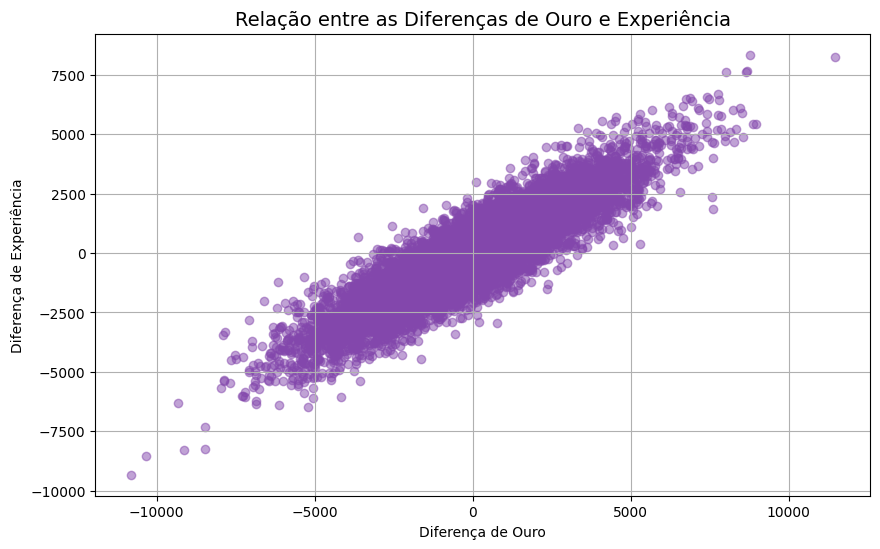

In [13]:
plt.figure(figsize=(10, 6)) # Define o tamanho da figura
plt.scatter(df_novo['TotalGoldDiff'], df_novo['TotalExperienceDiff'], alpha=0.5, color="#8347AC") # Cria um gráfico de dispersão (scatter plot) com transparência de 50%
plt.title('Relação entre as Diferenças de Ouro e Experiência', fontsize=14) # Adiciona um título ao gráfico
plt.xlabel('Diferença de Ouro') # Adiciona um rótulo ao eixo x
plt.ylabel('Diferença de Experiência') # Adiciona um rótulo ao eixo y
plt.grid(True) # Adiciona uma grade ao gráfico
plt.show() # Exibe o gráfico

Nesse primeiro gráfico, foi analisado a relação entre a diferença do total de ouro obtido e a diferença do total de experiência obtida. Partindo do conhecimento geral de jogos, sabe-se que o time ou jogador que realizar mais feitos, como mais abates de inimigos ou conquista de monstro de elite, recebe recompensas melhores e maiores, então quando se fala da diferença de ouro e experiência ganho entre os 2 times, é esperado que uma diferença alta de um indique uma diferença alta do outro também, já que esses fatores estão diretamente ligados ao sistema e regras básicas do jogo. O gráfico de dispersão acima mostra justamente isso: a tendência é que quanto maior a diferença de ouro entre os adversários (seja ela negativa ou positiva), maior será a diferença de experiência. Além disso, pode-se concluir que o mais próximo que essas diferenças forem de zero, mais equilibrado foi a partida em termos de habilidade dos jogadores e ações feitas pelos mesmos.

### Segundo Gráfico: Média Proporção de KDA se o Time Azul Venceu ou Não

In [14]:
fig = px.histogram(df_novo, x='blueWins', y='KDARatio', histfunc='avg', color='blueWins', color_discrete_map={0: "#DD3B3B", 1: "#3734C9"}) # Cria um histograma com a média do KDARatio por time vencedor

fig.update_layout(
    title_text='Média de Proporção KDA de acordo com Vitória ou Derrota do Time Azul ', # Título do gráfico
    xaxis_title='Azul foi Vencedor?', # Título do eixo x
    yaxis_title='Média de Proporção KDA', # Título do eixo y
    bargap=0.2, # Espaçamento entre as barras
    showlegend=False, # Remove a legenda
    height=500, # Altura do gráfico
    width=900, # Largura do gráfico
    title_font_size=18 # Tamanho da fonte do título
)

fig.update_xaxes(tickvals=[0, 1], ticktext=['Não', 'Sim']) # Define os valores e textos dos ticks do eixo x para melhor clareza

fig.show()

O uso da medida KDA ("Kills + Assists/Deaths") para determinar o desempenho de um time ou jogador é extremamente comum em muitos jogos online. Frequentemente, jogadores mais habilidosos ou times bem estruturados possuem um KDA elevado, tornando dele um bom indicador para definir a probabilidade de vitória de uma time. No caso do gráfico acima, foi calculado a média de proporção do KDA para quando a a variável alvo é igual a 0 (o time azul não venceu e o vermelho foi o vitorioso) e a quando é igual a 1 (o time azul foi o vencedor). A conclusão que é possível tirar com esse histograma é que o 'KDARatio' tende a ser menor quando o time azul perde, de média 1.4, o que indica que o time vermelho teve um KDA geral melhor, enquanto quando o time azul vence, o 'KDARatio' é maior, com média de 6.9, indicando que o KDA geral do time azul foi superior. Dessa maneira, é possível confirmar que essa variável tem uma relação bem forte com a variável alvo e possivelmente será essencial para as previsões dos modelos.

### Terceiro Gráfico: Média Proporção de Sentinelas Colocadas por Time Vencedor das Partidas

In [15]:
fig = px.histogram(df_novo, x='blueWins', y='WardsPlacedRatio', histfunc='avg', color='blueWins', color_discrete_map={0: "#DD3B3B", 1: "#3734C9"}) # Cria um histograma com a média do WardsPlacedRatio por time vencedor

fig.update_layout(
    title_text='Média de Proporção Sentinelas Colocadas por Time Vencedor', #
    xaxis_title='Time Vencedor',
    yaxis_title='Média de Proporção Sentinelas Colocadas',
    bargap=0.2,
    showlegend=False,
    height=500,
    width=900,
    title_font_size=18
)

fig.update_xaxes(tickvals=[0, 1], ticktext=['Vermelho', 'Azul'])

fig.show()

Por último, o gráfico acima mostra a média de proporção de sentinelas colocadas em partidas que cada time venceu. Essa análise é importante para compreender se determinados elementos do jogo em si tem uma relação direta com a vitória de um time, já que os gráficos anteriores buscaram entender a relação do time vencedor com medidas estatísticas conectadas com a habilidade pessoal dos jogadores e do time em si. Vendo que a média colocada é extremamente parecida, de 1.2 para quando time vermelho é vencedor e 1.3 quando o azul é, fica evidente que a relação de sentinelas colocadas com a variável alvo não tem praticamente relevância alguma, ou seja, esse determinado elemento presente em partidas não é um bom indicador para dizer qual o resultado final da partida será.

## Pré-Processamento

### Gráfico de Matriz de Correlação

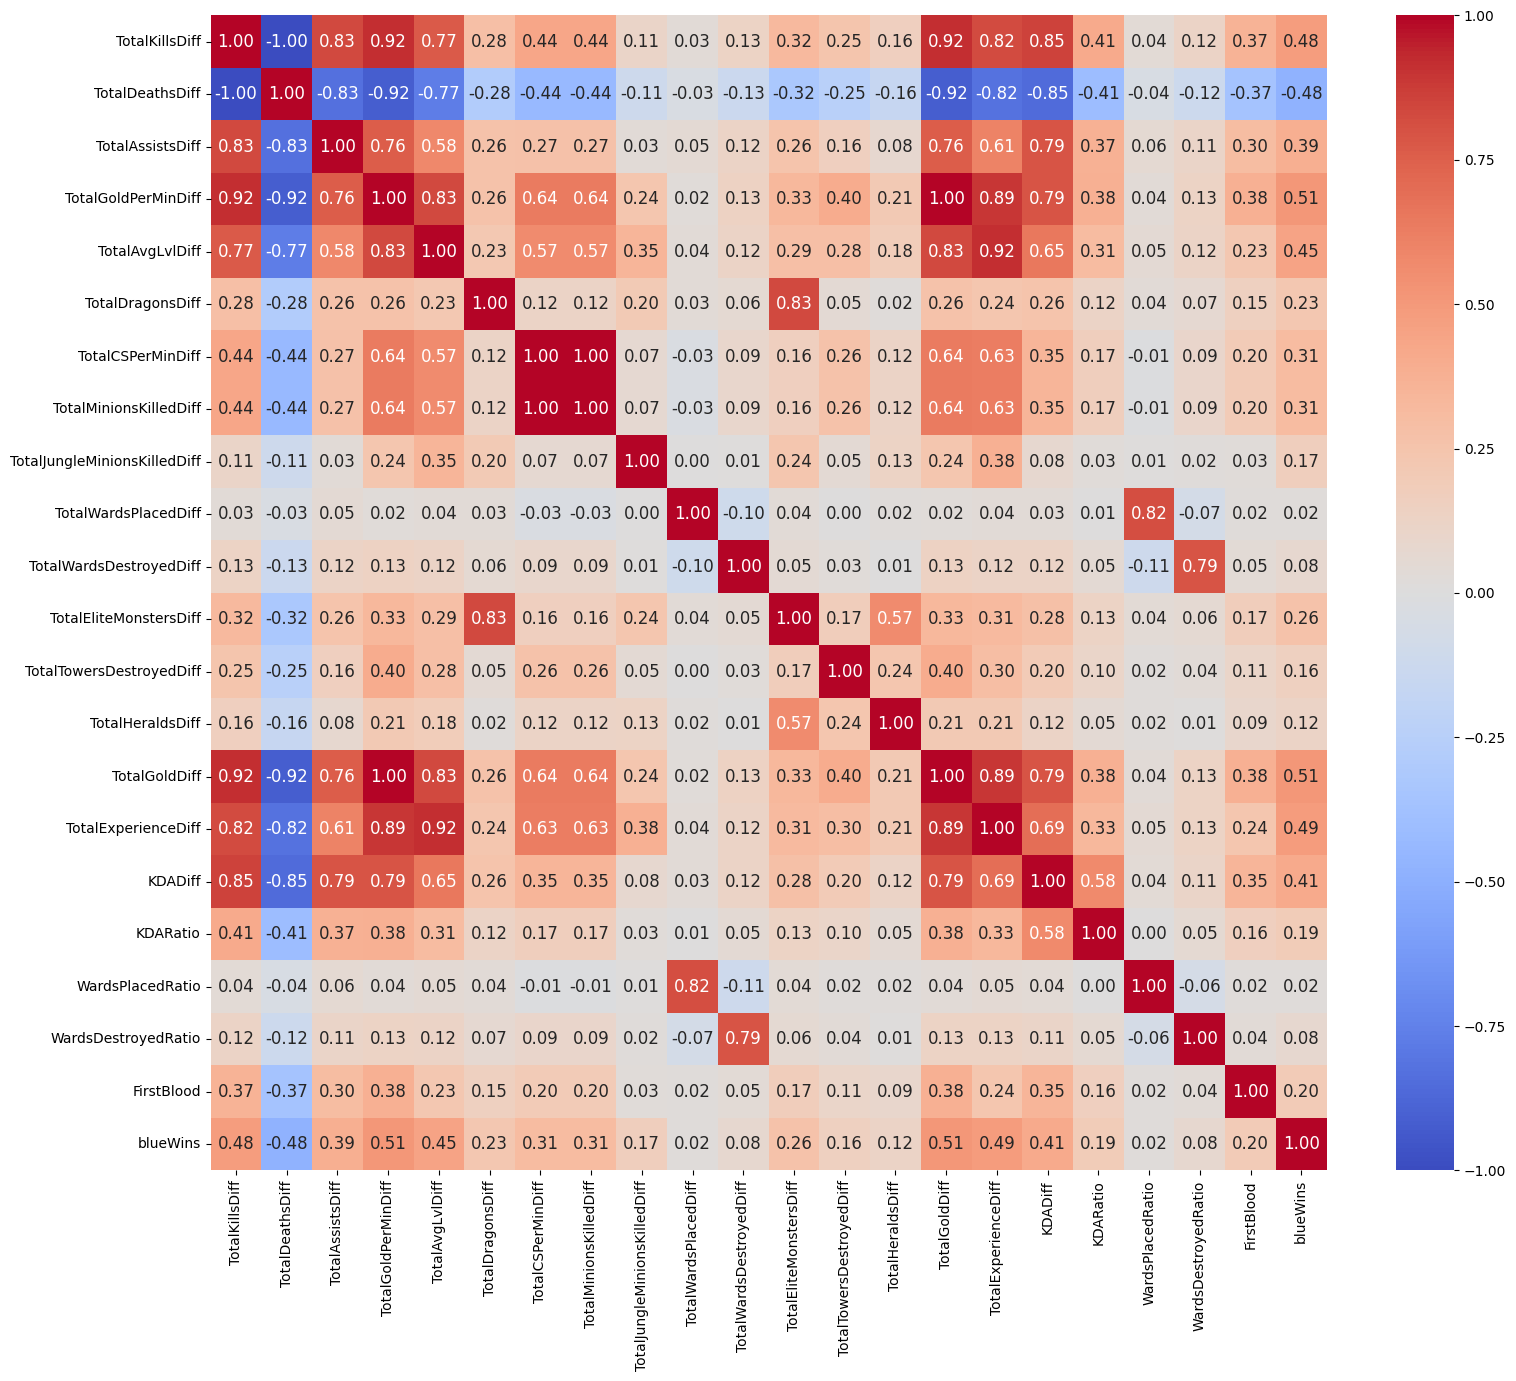

In [16]:
matriz_correlacao = df_novo.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(data=matriz_correlacao, vmin= -1, cmap='coolwarm', fmt='.2f', annot=True, annot_kws={'size': 12})
plt.show()

In [17]:
df_novo = df_novo.drop(['TotalDeathsDiff', 'TotalGoldPerMinDiff','TotalMinionsKilledDiff', 'TotalDragonsDiff', 'TotalHeraldsDiff',
                        'TotalWardsPlacedDiff', 'TotalWardsDestroyedDiff', 'WardsPlacedRatio', 'WardsDestroyedRatio'], axis=1)

O primeiro passo feito da etapa do pré-processamento de dados foi a criação de um gráfico de matriz de correlação. Esse gráfico tem como propósito quantificar a relação entre todas as variáveis presentes no DataFrame, que pode ser classificada como:
 
* Forte e Positiva: Se o valor de uma variável aumenta, o valor da outra também cresce ou se diminui, a outra diminui junto. No caso desse gráfico, quanto mais próximo de 1 e mais vermelho o quadrado for, mais forte é esse tipo de correlação e essa tendência

* Forte e Negativa: Se um valor de uma variável aumenta, o valor da outra variável diminui. No caso desse gráfico, quanto mais próximo de -1 e mais azul o quadrado for, mais forte é esse tipo de correlação e essa tendência

* Neutra ou Fraca: Aqui, o crescimento ou diminuição de uma variável não indica ou implica o aumento ou queda da outra, ou seja, não existe um relação direta entre elas. No caso desse gráfico, quanto mais próximo de 0 e mais cinza o quadrado for, mais fraca ou neutra é a correlação entre as variáveis

Vendo que ainda existem 21 variáveis além da variável alvo, analisar o gráfico de correlação permite perceber quais informações apresentam correlações fortes e que serão realmente valiosas para os modelos realizarem suas previsões. Aqui, se entende mais profundamente quais variáveis seriam desnecessárias para o processo de Machine Learning e podem ser descartadas para evitar um carregamento excessivo de informações pouco valiosas aos algoritmos, reduzindo a capacidade computacional necessária para o bom funcionamento dos modelos, simplificando e agilizando seus processamentos.

Dessa forma, com a análise das correlações, algumas características de certas variáveis foram notadas e isso permitiu definir que as seguintes colunas fossem retiradas do DataFrame:

* TotalDeathsDiff', 'TotalGoldPerMinDiff' e 'TotalMinionsKilledDiff': Essas 3 variáveis apresentaram boas correlações com diversas outras variáveis e até mesmo com a própria variável alvo, porém foi possível perceber que elas possuíam correlações perfeitas com outras 3 variáveis: 'TotalKillsDiff', 'TotalGoldDiff' e 'TotalCSPerMinDiff', respectivamente. Não só isso, as correlações dessas variáveis com as outras variáveis tinham o mesmo valor, com a única diferença sendo em relação as correlações de diferenças de morte e abates, em que a primeira possui correlações fortes e negativas e, a segunda, fortes e positivas, porém com o mesmo valor. Com isso, a presença de 3 duplas de variáveis idênticas e com uma relação perfeita não só aumentaria a complexidade dos modelos, como também causaria o efeito de multicolinearidade nos modelos. A multicolinearidade se trata de quando existem duas ou mais variáveis com correlações fortes entre si que os modelos acabam dando demasiada e exagerada importância a esse fator, descreditando outras correlações mias fracas mas que podem ser igualmente importantes para as previsões dos modelos. Assim, para evitar que os resultados finais sejam prejudicados, é necessário diminuir a redundância e eliminar uma das variáveis presentes nessas correlações, mantendo apenas uma mais necessária.

* 'TotalDragonsDiff' e 'TotalHeraldsDiff: Essas duas variáveis foram retiradas por motivos similares que as anteriores, porém diferentemente dessas, elas não apresentaram uma correlação perfeita com uma outra variável, mas sim uma relação muito forte com a 'TotalEliteMonstersDiff'. Apesar de não serem tão propensas a causar problemas de multicolinearidade para os modelos, sabe-se que essas 3 variáveis apresentam fatores sobre um mesmo elemento do jogo: os monstros de elite derrotados na partida. Considerando, então, que o a variável de diferença de monstro de elite derrotados inclui a diferença de dragões e arautos derrotados e vendo que as correlações dessas duas últimas variáveis mencionadas com as outras variáveis existentes são levemente mais fracas do que a 'TotalEliteMonstersDiff', ainda que muito parecidas, a decisão de excluí-las se baseia na visão de reduzir a dimensionalidade dos dados e fornecer uma visão mais geral sobre as partidas aos algoritmos, para que esses possam se adaptar melhor a novas informações.

* 'TotalWardsPlacedDiff', 'TotalWardsDestroyedDiff', 'WardsPlacedRatio' e 'WardsDestroyedRatio': Por fim, essas 4 últimas variáveis foram retiradas por um simples motivo: a falta de correlações significantes com qualquer outra variável que não seja entre elas. Ao analisar o gráfico de correlação, vemos que essas variáveis são as únicas a apresentarem correlações abaixo de 0.1 ou - 0.1 com a variável alvo e suas únicas correlações fortes, de 0.79 e 0.82, são entre si, o que é esperado por todas essas variáveis se tratarem da mesma mecânica de jogo: as sentinelas. Juntando isso ao fato de que a a análise bivariada também evidenciou que esse fator não tem grande importância em determinar o time vencedor, a sua remoção não afetará o desempenho de nenhum modelo e permitirá que informações mais limpas e concisas sejam passadas aos algoritmos.

Dessa forma, foram 9 variáveis foram retiradas, o que resulta em um novo df filtrado para ter apenas 12 variáveis independentes que podem ajudar em previsões da variável dependente.


### Separação de X e Y e Verificação de Componentes de PCA

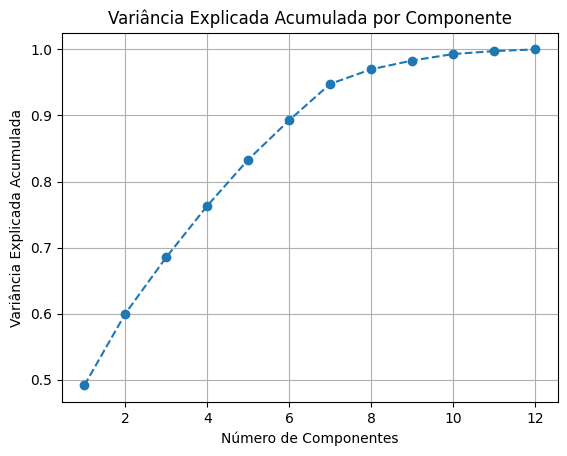

In [18]:
x = df_novo.drop('blueWins', axis=1) # Features/Variáveis independentes
y = df_novo['blueWins'] # Target/Variável dependente

sc = StandardScaler() # Inicializa o StandardScaler para normalização dos dados

df_x = x.copy() # Cria uma cópia das features para escalonamento

df_x = sc.fit_transform(df_x) # Aplica o escalonamento padrão

pca = PCA() # Inicializa o PCA com 12 componentes principais na cópia para verificar a variância explicada e aplicar o PCA no modelo oficial
pca.fit_transform(df_x) # Ajusta o PCA aos dados escalonados

variancia_explicada = pca.explained_variance_ratio_ # Obtém a proporção de variância explicada por cada componente principal
variancia_cumulativa = variancia_explicada.cumsum() # Calcula a variância explicada acumulada

plt.plot(range(1, 13), variancia_cumulativa, marker='o', linestyle='--') # Plota a variância explicada acumulada
plt.title('Variância Explicada Acumulada por Componente') # Título do gráfico
plt.xlabel('Número de Componentes') # Rótulo do eixo x
plt.ylabel('Variância Explicada Acumulada') # Rótulo do eixo y
plt.grid(True)
plt.show()

Após a redução do df através da análise de correlações, a próxima etapa do pré-processamento consiste em separar a base de dados em X e Y, ou seja, separar as variáveis independentes da variável alvo. Feito isso, antes de ir para a separação entre bases de treino e teste, o projeto buscou verificar se era possível reduzir ainda mais a dimensionalidade dos dados através do PCA (Análise de Componentes Principais). Através de uma cópia da base X, essa ferramenta é aplicada e se obtém variância explicada acumulada por cada componente principal, isso é, as variáveis independentes. 

Com isso, é possível calcular a variância explicada acumulada, que indica a porcentagem que a variância original pode ser explicada de acordo com a quantidade de componentes principais. Isso é mais fácil de ser compreendido através da análise do gráfico: cada ponto na reta indica o número de componentes (eixo X) e quanto essa quantidade explica a variância original dos dados (eixo Y), ou seja, no primeiro ponto, temos 1 componente e vemos que apenas ele explica menos de 50% da variância dos dados, enquanto 5 componentes explicam um pouco a mais de 80%.

O motivo de ser utilizado uma cópia é para poder verificar por completo quanto cada número de componentes tem de porcentagem e poder escolher qual o número ideal para aplicar aos dados oficialmente. Nesse caso, se vê que 7 componentes explicam cerca de 95% e 8 explicam apenas um pouco mais do que isso. Com isso, por esse ponto ser onde a diferença entre porcentagem começa a diminuir até ser mínima, pode-se afirmar que 7 componentes seria o número ideal para reduzir a complexidade dos algoritmos, facilitar suas análises e ainda obter bons resultados.

### Separação em Bases de Treino e Teste, Aplicação de Padronização e PCA

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=7) # Divide os dados em conjuntos de treino e teste (75% treino, 25% teste)

x_train_scaled = sc.fit_transform(x_train) # Aplica o escalonamento padrão aos dados de treino
x_test_scaled = sc.transform(x_test) # Aplica o mesmo escalonamento aos dados de teste

pca = PCA(n_components=12) # Inicializa o PCA com 12 componentes principais

x_train_pca = pca.fit_transform(x_train_scaled) # Aplica o PCA aos dados de treino e ajusta o modelo
x_test_pca = pca.transform(x_test_scaled) # Aplica o PCA aos dados de teste 

# Verificação das dimensões dos conjuntos de dados após a padronização e PCA
print(f'''X_train: {x_train_pca.shape} 
y_train: {y_train.shape}
X_test: {x_test_pca.shape}
y_test: {y_test.shape}
 ''')

X_train: (7409, 12) 
y_train: (7409,)
X_test: (2470, 12)
y_test: (2470,)
 


Nessa etapa, agora se divide X e Y em bases de treino e teste, resultando em 4 bases. As bases de treino X e Y recebem maior quantidade de dados pois é a partir delas que os modelos aprenderão e treinarão, buscando reconhecer os padrões para realizar previsões da variável alvo. Após esse processo de aprendizado, os modelos recebem dados inéditos para fazerem previsões, que são as bases de teste, permitindo entender se o algoritmo foi capaz de identificar os padrões visto durante o treinamento e obter um bom desempenho, além de quais de seus aspectos podem ser melhorados.

Feita essa separação, é importante garantir que os dados das variáveis independentes estejam padronizados, isso é, estão todos na mesma escala. Esse processamento é feito para evitar confusão dos modelos ao comparar os valores de diferentes variáveis, que podem ter uma variação pequena, como de 0 a 10, ou uma variação elevada de 10.000 para 100.000. Inicializando uma instância do "StandardScaler()", é possível aplicar a mesma escala para todos os valores das bases X, que passam a ter uma média 0 e um desvio padrão de 1 e assim garantir mais estabilidade durante o funcionamento dos modelos. A escolha desse método de padronização ao invés de outro se dá de3vido ao fato de essa ser a ferramenta mais comum e eficaz em diferentes modelos de Machine Learning.

Então, após isso, é possível aplicar o PCA com o número de componentes desejado, obtido pela análise do gráfico feita anteriormente. Apesar da conclusão ter sido que 7 componentes principais seria a quantidade ideal para maior praticidade do modelo e seu compreendimento, as avaliações finais dos modelos mostraram um resultado melhor ao receber todos os 12 componentes existentes, então esse foi o número escolhido para que o desempenho fosse o melhor possível.

Por fim, como medida de segurança, é importante garantir através do '.shape' que as bases de treino possuem a mesma quantidade de dados, assim como as de teste, e que existem 12 variáveis nas duas bases X.

### Balanceamento

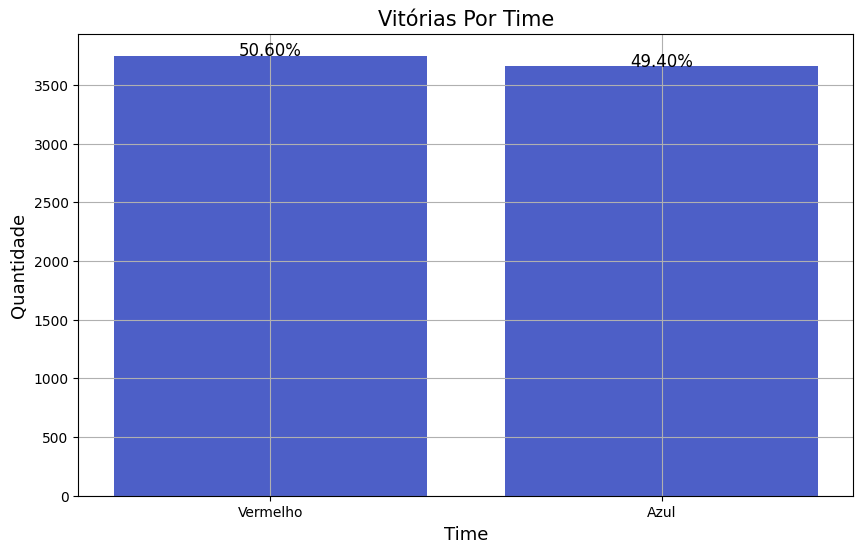

blueWins
0    3749
1    3660
Name: count, dtype: int64


In [20]:
quantidade = y_train.value_counts()
porcentagem = (quantidade/ quantidade.sum()) *100

plt.figure(figsize=(10,6)) # Define o tamanho do gráfico
plt.bar(quantidade.index, quantidade, color="#4D5FC7") # Cria um gráfico de barras com os nomes dos valores e sua quantidade 

for i, valor in enumerate(quantidade):
    plt.text(i, valor+1, f'{porcentagem.iloc[i]:.2f}%', ha='center', fontsize=12) # Coloca a porcentagem em duas casas decimais de cada valor em cima de sua barra

plt.title('Vitórias Por Time', fontsize=15) # Define o título do gráfico
plt.ylabel('Quantidade', fontsize=13) # Define o nome do eixo Y
plt.xlabel('Time', fontsize=13) # Define o nome do eixo X
plt.xticks([0, 1], ['Vermelho', 'Azul'])
plt.grid(True) # Adiciona um grid
plt.show() # Mostra o gráfico

print(quantidade)

Finalizando a etapa de pré-processamento, é essencial verificar se as possíveis classificações que a variável alvo pode ter estão balanceados, isso é, que os resultados possíveis possuem mesma quantidade. Isso se deve pois é durante o treinamento que o modelo identificar os padrões para realizar as classificações e previsões de cada resultado possível, então se um valor for muito mais prevalente na base de treino, o modelo se ajustará muito bem a ele apenas e não conseguirá prever outros resultados possíveis ao se deparar com novas informações. Para evitar essa situação, o modelo deve aprender os padrões de cada valor da variável dependente em mesma quantidade, então se houver um grande desbalanceamento, é necessário adicionar dados sintéticos ao treino para que os valores minoritários tenham a mesma quantidade que o majoritário, tudo ficando nivelado. 

No caso desse projeto, na base de treino, a variável alvo 'blueWins' tem 50.6% (3749) casos com valor '0', ou seja, partidas que o time vermelho foi vencedor, e 49.4% (3660) de casos com valor '1', indicando vitória do time azul. Por essa diferença ser bem pequena, não há necessidade de aplicar 'SMOTE', ferramenta utilizada para balancear os dados por meio de 'oversampling' (adição de dados sintéticos da classe minoritária) ou 'undersampling' (redução de casos da classe majoritária)

## Modelagem

Essa é a etapa em que os dados prontos serão fornecidos para os diferentes algorítimos para realizar as previsões e alcançar o objetivo do projeto de identificar corretamente qual time vitorioso através das características de cada partida. Visando encontrar os melhores resultados possíveis, um total de 4 modelos foram utilizados, estabelecendo hiperparâmetros que otimizam as suas capacidades e buscando contornar problemas comuns e frequentes como "overfitting" ou alta quantidade de erros sem a devida correção e regulação, possibilitando maior controle do processamento dos algoritmos. 

### Primeiro Modelo: Regressão Logística

In [21]:
rl = LogisticRegression(random_state=7) # Instanciando a Regressão Logística

param_grid_rl ={ # Definindo a grade de hiperparâmetros para busca
    'C':  [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'max_iter': [50, 100, 200]
}

grid_search_rl = GridSearchCV(estimator=rl, param_grid=param_grid_rl, verbose=2, n_jobs=-1, scoring='f1', cv=5) # Configurando a busca em grade com validação cruzada

grid_search_rl.fit(x_train_pca, y_train) # Treinando o modelo com os dados de treino
 
print(grid_search_rl.best_params_) # Exibindo os melhores hiperparâmetros encontrados

rl_best = grid_search_rl.best_estimator_  # Obtendo o melhor modelo treinado

train_rl_y_pred = rl_best.predict(x_train_pca) # Previsões no conjunto de treino

test_rl_y_pred = rl_best.predict(x_test_pca) # Previsões no conjunto de teste

Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'C': 0.1, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}


O primeiro modelo escolhido foi o de Regressão Logística, modelo de aprendizado supervisionado utilizado especialmente para casos de classificação binária, como é o caso do objetivo do projeto. Baseando-se no cálculo da Função Sigmoide, a regressão logística calcula a probabilidade da variável alvo pertencer a certa categoria, nesse caso, '0' ou '1', em que o resultado final será um valor entre 0 e 1, em que os resultados maiores que o limite estabelecido são categorizados como '1' e os menores, como '0'. Esse foi o primeiro modelo escolhido não só por ser ideal para esse tipo de projeto, mas também por ser mais simples, exigir menos capacidade computacional e ter uma interpretação mais dinâmica de ser feita.

##### Sobre os Hiper Parâmetros de Regressão Logística: 

* **'C'**: Parâmetro que define a força de regularização/penalização do modelo quanto à complexidade e ‘overfitting’ do modelo 

* **'penalty'**: Tipo de penalidade/regularização aplicada 
    * **'l1'**: Adiciona uma penalidade baseada no valor absoluto dos coeficientes. Útil na seleção de variáveis 
    * **'l2'**: Adiciona uma penalidade baseada no quadrado dos coeficientes. Diminui-os para evitar 'overfitting' 

* **'solver'**: Define o algoritmo para otimizar o modelo 
    * **'liblinear'**: Algoritmo eficiente para base de dados menores e que pode receber penalização 'l1' ou 'l2' 

* **'max_iter'**: Número de vezes que o algorítimo tentará otimizar os parâmetros em busca de encontrar o melhor resultado

Aqui, os hiperparâmetros escolhidos foram feitos visando melhorar o desempenho do modelo de forma geral, buscando a melhor forma de lidar com os outliers não tratados para que o resultado obtidos sejam bons e os erros não se tornem obstáculos impossíveis de superar

### Segundo Modelo: Random Forest

In [22]:
rf = RandomForestClassifier(random_state=7) # Cria a instância do classificador RandomForest

param_grid_rf ={
    'n_estimators': [50 , 80, 100],         
    'min_samples_leaf':[3, 5, 8],          
    'min_samples_split': [2, 5],            
    'max_features': ['sqrt', 'log2', None], 
    'criterion': ['gini', 'entropy'],       
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, verbose=2, n_jobs=-1, scoring='f1', cv=5) 

grid_search_rf.fit(x_train_pca, y_train)
 
print(grid_search_rf.best_params_)

rf_best = grid_search_rf.best_estimator_ 

train_rf_y_pred = rf_best.predict(x_train_pca)

test_rf_y_pred = rf_best.predict(x_test_pca)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 100}


O segundo modelo utilizado foi o Random Forest, um método de Machine Learning de "ensemble", ou seja, uma técnica que utiliza um conjunto de modelos para realizar previsões com diferentes amostras dos dados, os combina e retorna, dessa forma, um resultado final mais preciso do que utilizando apenas um modelo simples. No caso do Random Forest, são criadas várias Árvores de Decisão diferentes, que recebem e processam os dados por amostras aleatórias e distintas, realizando o processo padrão desse modelo mais simples, que consiste em fazer questionamentos usando as variáveis de características e, a partir de cada resposta possível se ramifica em um caminho que pode levar a uma nova pergunta ou a uma previsão de classificação. A primeira pergunta, conhecida como "raiz", é escolhida como o melhor ponto de partida das características da base pelo algoritmo para dividir as informações e gera os primeiros "ramos", as possíveis respostas de cada pergunta, que resultam em "nós", novas pergunta fundada nas variáveis independentes que causam novos ramos, ou em "folhas", que são o resultado final de cada possível caminho e contém as previsões, o que causa uma ramificação similar a uma árvore.

Esse modelo também visa combater um problema muito comum presente nos modelos simples de Árvore de Decisão: o "overfitting", ou seja, a compreensão excessiva dos dados de treinamento a ponto de classificá-los perfeitamente, mas em detrimento de ser incapaz de prever dados novos e inéditos. Dessa forma, o Random Forest recebe as ótimas vantagens da Árvore de Decisão, com menos sensibilidade a "outliers", ao mesmo tempo que melhora sua precisão e reduz as desvantagens.

##### Sobre os Hiper parâmetros do Random Forest: 

* **'max_depth'**: Define a profundidade máxima da árvore 

* **'min_samples_leaf'**: Define o número mínimo de amostras em uma folha 

* **'min_samples_split'**: Define o número mínimo de amostras para dividir um nó 

* **'max_features'**: Define o número de características a considerar em cada divisão do nó 
    * **'sqrt'**: Leva em consideração um número igual à raiz quadrada do total de características disponíveis 
    * **'log2'**: Leva em consideração um número igual ao logaritmo na base 2 do total de características 
    * **None**: Leva em consideração todas as características disponíveis 

* **'criterion'**: Determina a função de avaliação da qualidade da divisão do nó 
    * **'gini'**: Avalia a impureza do nó 
    * **'entropy'**: Avalia a desordem do nó 

### Terceiro Modelo: SVM

In [23]:
svm = SVC() # Cria a instância do classificador SVM

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
}

grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, verbose=2, n_jobs= -1, scoring='f1', cv=5)

grid_search_svm.fit(x_train_pca, y_train)

print(grid_search_svm.best_params_)

svm_best = grid_search_svm.best_estimator_

train_svm_y_pred = svm_best.predict(x_train_pca)

test_svm_y_pred = svm_best.predict(x_test_pca)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'C': 100, 'kernel': 'linear'}


O terceiro modelo utilizado nesse projeto é o SVM ("Support Vector Machine"). Esse algorítimo é mais robusto e otimizado que os outros 2 exemplos anteriores devido a sua forte e sólida abordagem matemática, o permitindo ser usado para tanto casos de regressão como de classificação e o seu funcionamento se baseia em encontrar o hiperplano ideal que separa os dados nas diferentes classes com a máxima margem possível, ou seja, procura encontrar uma "linha divisória" que melhor realiza a separação dos dados em suas possíveis classificações. Além disso, a escolha desse modelo para o projeto também se baseia por ter uma excelente capacidade de generalização, evitando "overfitting" e sua extrema eficácia ao lidar com muitas variáveis independentes.

##### Sobre os Hiper parâmetros do SVM:

* **'C'**: Parâmetro que define a força de regularização/penalização do modelo quanto à complexidade e ‘overfitting’ do modelo

* **'kernel'**: Mapeia os dados para um espaço de características de dimensão superior, tornando problemas não-lineares em linearmente separáveis, ou seja, analisa o conjunto de dados de entrada, extremamente misturados, e os separa de maneira eficiente
    * **'linear'**: Busca separar os dados com uma linha reta ou plano simples, melhor para dados mais bem separados
    * **'rbf'**: Busca mapear os dados para um espaço de dimensão infinita, criando fronteiras de decisão circulares/curvas complexas, ideal para situações não-lineares

### Quarto Modelo: XGBoost

In [24]:
xgboost = xgb.XGBClassifier(random_state=7) # Instanciando o XGBoost

param_grid_xgboost = { 
'learning_rate': [0.01, 0.05, 0.1],
'n_estimators': [50, 100, 200],
'max_depth': [2, 5, 8],
'min_child_weight': [1, 3, 7],
'min_split_loss': [1, 3], 
'subsample': [0.5, 0.8, 1],
'colsample_bytree': [0.5, 0.8, 1],
'lambda': [0.1], 
'alpha': [0]
}

grid_search_xgboost = GridSearchCV(estimator=xgboost, param_grid=param_grid_xgboost, verbose=2, n_jobs= -1, scoring='f1', cv=5)

grid_search_xgboost.fit(x_train_pca, y_train) 

print(grid_search_xgboost.best_params_)

xgboost_best = grid_search_xgboost.best_estimator_ 

train_xgboost_y_pred = xgboost_best.predict(x_train_pca)

test_xgboost_y_pred = xgboost_best.predict(x_test_pca)

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits
{'alpha': 0, 'colsample_bytree': 0.8, 'lambda': 0.1, 'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 7, 'min_split_loss': 1, 'n_estimators': 100, 'subsample': 0.5}


O quarto modelo escolhido foi XGBoost, um modelo de aprendizado de máquina otimizado que consiste na realização de diversas árvores de decisão, similar ao Random Forest, em que a primeira árvore apresenta seus resultados e a segunda árvore identifica os erros que ela teve e buscar corrigir e apresentar novos resultados que também serão identificados e corrigidos por uma nova árvore e assim subsequentemente até chegar em um ponto em que os resultados todos são juntados para fornecer a melhores previsões possíveis, o que faz desse modelo um aprendizado de ensemble. A escolha desse modelo se dá justamente por ser mais robusto e otimizado, sendo mais avançado que modelos mais simples para gerar resultados mais eficientes e por ter uma boa resistência aos "outliers" que, como visto, foram mantidos sem alterações. 

##### Sobre os Hiper parâmetros do XGBoost: 

* **'max_depth'**: Define a profundidade máxima das árvores

* **'min_child_weight'**: Define o peso mínimo de uma folha das árvores

* **'min_split_loss'**: Define a perda mínima de uma divisão de um nó das árvores para que essa ocorra

* **'subsample'**: A porcentagem de linhas da base de dados utilizada para treinar as árvores

* **'colsample_bytree'**: A porcentagem de colunas da base dados utilizadas para treinar as árvores

* **'n_estimators'**: Define o número total de árvores a serem construídas

* **learning_rate'**: Controla a taxa de aprendizado e sua velocidade de corrigir erros, com valores menores exigindo mais n_estimators mas gerando um modelo mais robusto
 
* **'lambda'**:  Uma forma de penalização baseada no quadrado dos coeficientes. Diminui-os para evitar 'overfitting' 

* **'alpha'**: Uma forma de penalização baseada no valor absoluto dos coeficientes. Útil na seleção de variáveis 

A escolha desses hiperparâmetros tem como objetivo principal garantir que o modelo consiga ter uma generalização boa, já que um lado muito negativo do XGBoost é sua sensibilidade ao 'overfitting'. Através de testes utilizando valores diferentes para cada um desses hiperparâmetros e verificando as métricas e o cross validation, foi possível descobrir que a combinação utilizada nesse projeto foi a com menor super ajuste do modelo aos dados de treino

### GridSearchCV
Para gerar os resultados mais positivos possíveis, foram utilizados hiper parâmetros, que diferentemente dos parâmetros normais, são configurações manualmente escritas antes do treinamento que visam otimizar o modelo para melhorar sua performance e capacidade de generalização. Com isso, visando buscar a melhor combinação de hiper parâmetros possíveis, utiliza-se o 'GridSearchCV', que recebe um 'param_grid' que contém quais valores cada hiper parâmetro pode receber e realiza uma busca exaustiva com as bases de treino para encontrar a melhor combinação possível para ser devolvida. 

Com isso, ao realizar esse processo de busca, é possível pegar esse resultado através do 'best_estimator' e aplicá-lo para, de fato, realizar previsões as bases de treino e teste. 

##### Sobre os Parâmetros de GridSearchCV: 

* **estimator**: Recebe o modelo que terá os hiper parâmetros testados 

* **param_grid**: Recebe os hiper parâmetros a serem testados 

* **cv**: Recebe o número de folds(dobras) para o Cross Validation 

* **n_jobs**: Controla o poder de processamento para realizar tarefas paralelas 

* **verbose**: Controla as informações impressas durante a execução 

* **scoring**: Determina a métrica a ser analisada para definir a melhor combinação 

## Avaliação dos Modelos

#### Funções para Gráficos de Avaliação

In [25]:
def criar_matriz_confusao(y_true, y_pred, modelo, conjunto):
    cm = confusion_matrix(y_true, y_pred) # Calcula a matriz de confusão
    labels = ['Vermelho', 'Azul'] # Define os rótulos para os eixos

    fig = ff.create_annotated_heatmap( # Cria um mapa de calor anotado
        z=cm, # Dados da matriz de confusão
        x=labels, # Rótulos do eixo x
        y=labels, # Rótulos do eixo y
        colorscale='purples', # Define a escala de cores
        showscale=True, # Mostra a escala de cores
    )

    fig.update_layout( # Atualiza o layout da figura
        title_text=f'Matriz de Confusão - {modelo} ({conjunto})', # Título da figura
        xaxis_title='Predito', # Título do eixo x
        yaxis_title='Verdadeiro', # Título do eixo y
        height=400, # Altura da figura
        width=1000, # Largura da figura
        font=dict( # Define a fonte, o tamanho e cor do texto
            family='Arial',
            size=13,
            color='black')
    )

    fig.update_xaxes(tickvals=[0, 1], ticktext=['Vermelho', 'Azul']) # Define os valores e textos dos ticks do eixo x para melhor clareza
    fig.update_yaxes(tickvals=[0, 1], ticktext=['Vermelho', 'Azul']) # Define os valores e textos dos ticks do eixo y para melhor clareza

    fig.show() # Exibe a figura

def criar_auc_roc(y_true, y_scores, modelo, conjunto):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores) # Calcula a curva ROC
    auc_roc = roc_auc_score(y_true, y_scores) # Calcula a área sob a curva ROC

    plt.figure(figsize=(10, 6)) # Define o tamanho da figura
    plt.plot(fpr, tpr, color='#4D5FC7', label=f'AUC = {auc_roc:.2f}') # Plota a curva ROC
    plt.plot([0, 1], [0, 1], color='red', linestyle='--') # Plota a linha de referência
    plt.title(f'Curva ROC - {modelo} ({conjunto})', fontsize=16) # Título do gráfico
    plt.xlabel('Taxa de Falsos Positivos', fontsize=14) # Rótulo do eixo x
    plt.ylabel('Taxa de Verdadeiros Positivos', fontsize=14) # Rótulo do eixo y
    plt.legend(loc='lower right', fontsize=12) # Adiciona a legenda
    plt.grid(True) # Adiciona uma grade ao gráfico
    plt.show() # Exibe o gráfico

#### Métricas de Avaliação

Com as previsões dos modelos já feitas, chega-se na última etapa do projeto: a avaliação de desempenho de cada modelo feito. Para isso, são utilizadas métricas confiáveis e frequentemente utilizadas para casos de projetos de classificação, sendo elas:

* **Precision**: A precisão indica a porcentagem de previsões do modelo de uma categoria que são, de fato, daquela classe. Em outras palavras, é a taxa de acerto das previsões feitas em relação a todas as previsões que o modelo realizou para aquela categoria 

* **Recall**: Indica a porcentagem das previsões corretas feitas de uma categoria em relação a todos os casos verdadeiramente pertencentes aquela categoria. Ou seja, é a quantidade de previsões que foram corretamente identificadas em comparação com todos os casos pertencentes a determinada classe

* **F1-Score**: É a média harmônica entre a precisão e o "recall", ou seja, é a junção de ambas as métricas em apenas um valor, permitindo uma visão mais geral da capacidade do modelo em relação a cada classe

* **Accuracy**: É a taxa de acerto das previsões do modelo em relação a todos os casos possíveis, isso é, a porcentagem total de previsões corretas

* **Matriz de Confusão**: Uma demonstração visual das classificações que o modelo vez, mostrando a quantidade numérica de previsões feitas para cada categoria, quantas estavam corretas e quantas foram categorizadas incorretamente e para qual categoria elas foram previstas 

* **Cross Validation**: Conjunto de valores que indicam o desempenho de modelos iguais aos que estão sendo avaliados, porém ao receber conjuntos de dados de treino e teste da mesma base, mas diferentes entre si, ou seja, recebem as mesmas informações, porém alterando sua ordem e posição. Aqui, foram feitos os padrão de 5 "folds" para a avaliação cruzada e uma média dos valores foi calculada e retornada. Essa métrica garante que o modelo oficial não tenha sofrido de problemas, como enviesamento, por causa da forma como os dados foram estruturados e organizados ao serem passados ao modelo

* **Curva ROC**: Gráfico que visualiza a performance do modelo em todos os possíveis limiares de decisão, onde o eixo Y é a Taxa de Verdadeiros Positivos e o eixo X é a Taxa de Falsos Positivos, ambos indo de 0 a 1. Quanto mais rapidamente a curva sobe no eixo Y, se aproximando de 1, e mais perto de 0 no eixo X ela fica, melhor foi a performance do modelo. Esse gráfico permite garantir que as previsões sendo feitas são mais eficazes que um chute ao certificar que a curva não seja uma diagonal perfeita ou, ainda pior, menos eficaz que um chute, sendo mais próxima ao 1 do eixo X e 0 do eixo Y

* **AUC Score**: É a área sob a curva ROC, ou seja, o valor único que resume o desempenho da curva ROC e indica e explica o seu comportamento. Indica o quão bem o modelo consegue distinguir entre as classes

Com as métricas explicadas, é possível partir para a avaliação específica dos resultados de cada modelo.

### Primeira Avaliação: Regressão Logística

#### Treino

In [26]:
relatorio_rl_train = classification_report(y_train, train_rl_y_pred) # Relatório de classificação para o conjunto de treino
cross_validation_rl_train = grid_search_rl.best_score_ # Melhor score de validação cruzada

print(f'\nRelatório:\n{relatorio_rl_train}')
print(f'\nCross Validation: {cross_validation_rl_train:.2f}')

criar_matriz_confusao(y_train, train_rl_y_pred, 'Regressão Logística', 'Treino') # Chama a função para criar a matriz de confusão


Relatório:
              precision    recall  f1-score   support

           0       0.73      0.74      0.74      3749
           1       0.73      0.73      0.73      3660

    accuracy                           0.73      7409
   macro avg       0.73      0.73      0.73      7409
weighted avg       0.73      0.73      0.73      7409


Cross Validation: 0.73


#### Teste

In [27]:
relatorio_rl_test = classification_report(y_test, test_rl_y_pred)
cross_validation_rl_test = grid_search_rl.best_score_

print(f'\nRelatório:\n{relatorio_rl_test}')
print(f'\nCross Validation: {cross_validation_rl_test:.2f}')

criar_matriz_confusao(y_test, test_rl_y_pred, 'Regressão Logística', 'Teste') 


Relatório:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1200
           1       0.75      0.71      0.73      1270

    accuracy                           0.73      2470
   macro avg       0.73      0.73      0.73      2470
weighted avg       0.73      0.73      0.73      2470


Cross Validation: 0.73


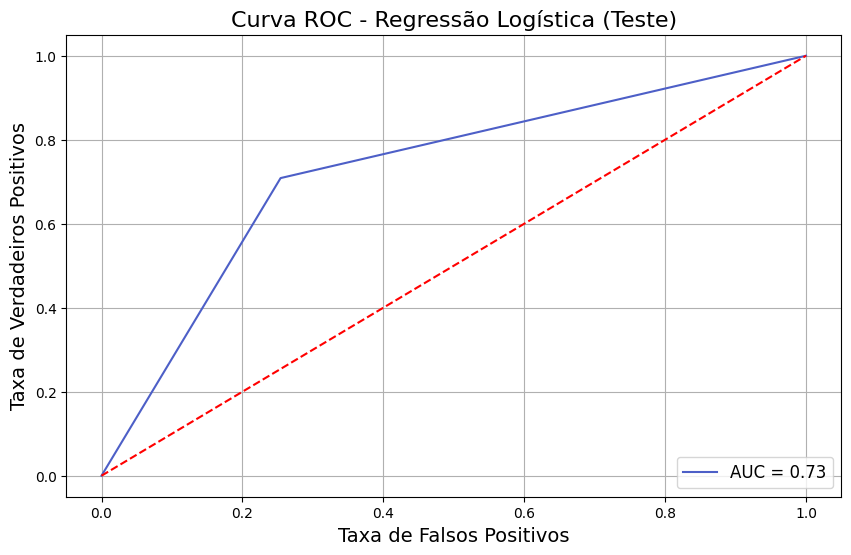

In [28]:
criar_auc_roc(y_test, test_rl_y_pred, 'Regressão Logística', 'Teste') # Chama a função para criar a curva AUC-ROC

Ao comparar os resultados do relatório de classificação da base de treino com a de teste, percebe-se que o modelo de regressão logística tinha obtido, originalmente, precisões e recalls semelhantes para ambas as classes. Contudo, os resultados da base de teste apresentaram melhoria na precisão da classe '1' e do recall da classe '0', indo de 0.73 e 0.74 para 0.75, mas uma queda para a precisão da classe '0' e o recall da classe '1', indo de 0.73 para 0.71, com a queda do f1-score da classe '0' em 0.01, indo para o mesmo que o da classe '1', de 0.73. Ainda assim, a acurácia permaneceu a mesma, em 0.73.

Analisando a matriz de confusão das duas bases, fica mais evidente o que ocorreu: enquanto no treino, mais casos de classe '0', isso é, mais casos em que o time vermelho venceu, foram previstos corretamente, na base de teste, mais casos de classe '1', ou seja, mais casos em que o time azul venceu, foram previstos corretamente. Ao mesmo tempo, foram previstos incorretamente mais casos da classe '1' do que '0' em quantidade maior no teste do que no treino.

Para o gráfico da curva ROC, percebe-se que a AUC é de 0.73 e que a reta está mais próxima do canto superior esquerdo, o que indica que o modelo realizou um bom desempenho nas classificações. Dessa forma, pode-se concluir que, para um modelo mais simples como a regressão logística, um desempenho bom é extremamente satisfatório.

### Segunda Avaliação: Random Forest

#### Treino

In [29]:
relatorio_rf_train = classification_report(y_train, train_rf_y_pred)
cross_validation_rf_train = grid_search_rf.best_score_

print(f'\nRelatório:\n{relatorio_rf_train}')
print(f'\nCross Validation: {cross_validation_rf_train:.2f}')

criar_matriz_confusao(y_train, train_rf_y_pred, 'Random Forest', 'Treino')


Relatório:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      3749
           1       0.87      0.87      0.87      3660

    accuracy                           0.87      7409
   macro avg       0.87      0.87      0.87      7409
weighted avg       0.87      0.87      0.87      7409


Cross Validation: 0.72


#### Teste

In [30]:
relatorio_rf_test = classification_report(y_test, test_rf_y_pred)
cross_validation_rf_test = grid_search_rf.best_score_

print(f'\nRelatório:\n{relatorio_rf_test}')
print(f'\nCross Validation: {cross_validation_rf_test:.2f}')

criar_matriz_confusao(y_test, test_rf_y_pred, 'Random Forest', 'Teste') 


Relatório:
              precision    recall  f1-score   support

           0       0.70      0.73      0.72      1200
           1       0.74      0.70      0.72      1270

    accuracy                           0.72      2470
   macro avg       0.72      0.72      0.72      2470
weighted avg       0.72      0.72      0.72      2470


Cross Validation: 0.72


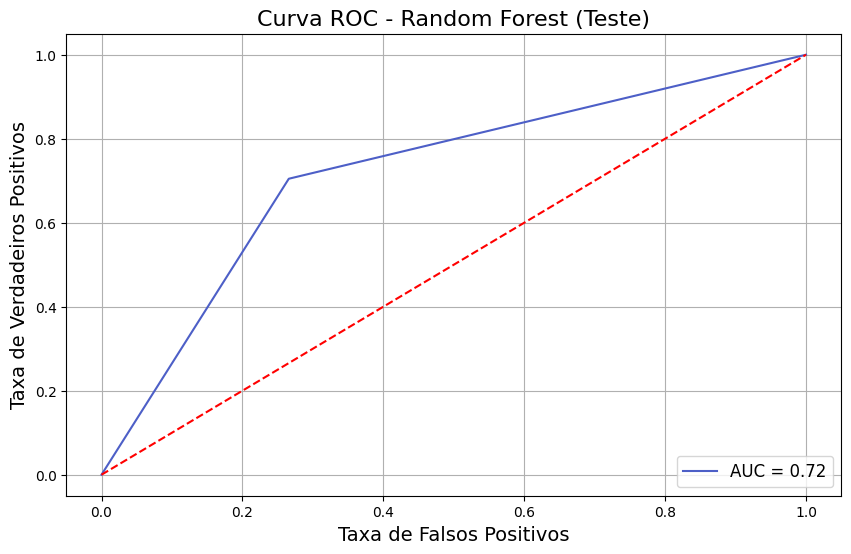

In [31]:
criar_auc_roc(y_test, test_rf_y_pred, 'Random Forest', 'Teste') 

No modelo de "random forest", a primeira característica que pode ser percebida é a grande diferença entre os resultados do relatório de classificação da base de treino e os da base de teste: enquanto na base de treino, foram obtidos excelentes resultados de 0.87 em todas as métricas, o mesmo não ocorreu para base de teste, que obteve f1-score e acurácia de 0.72. Pode-se dizer, então, que esse método de "ensemble" sofreu de "overfitting" ou enviesamento devido a configuração dos dados, visto que a validação cruzada foi de 0.72 nas duas bases. Além disso, analisando a matriz de confusão, percebe-se que menos casos foram corretamente previstos do que no modelo anterior, fator confirmado com ainda mais força pelas precisões e recalls da base de teste, bem como pela curva ROC, que obteve um AUC 0.01 pior.

A conclusão final é de que, mesmo que os resultados ainda sejam bons, a discrepância entre as métricas de treino e teste, juntamente com o fator de que esse modelo é mais robusto do que o de regressão logística, tornam esse modelo pouco ideal para alcançar o objetivo do projeto.

### Terceira Avaliação: SVM

#### Treino

In [32]:
relatorio_svm_train = classification_report(y_train, train_svm_y_pred)
cross_validation_svm_train = grid_search_svm.best_score_

print(f'\nRelatório:\n{relatorio_svm_train}')
print(f'\nCross Validation: {cross_validation_svm_train:.2f}')

criar_matriz_confusao(y_train, train_svm_y_pred, 'SVM', 'Treino') 


Relatório:
              precision    recall  f1-score   support

           0       0.73      0.74      0.74      3749
           1       0.73      0.73      0.73      3660

    accuracy                           0.73      7409
   macro avg       0.73      0.73      0.73      7409
weighted avg       0.73      0.73      0.73      7409


Cross Validation: 0.73


#### Teste

In [33]:
relatorio_svm_test = classification_report(y_test, test_svm_y_pred)
cross_validation_svm_test = grid_search_svm.best_score_

print(f'\nRelatório:\n{relatorio_svm_test}')
print(f'\nCross Validation: {cross_validation_svm_test:.2f}')

criar_matriz_confusao(y_test, test_svm_y_pred, 'SVM', 'Teste') 


Relatório:
              precision    recall  f1-score   support

           0       0.71      0.74      0.73      1200
           1       0.75      0.72      0.73      1270

    accuracy                           0.73      2470
   macro avg       0.73      0.73      0.73      2470
weighted avg       0.73      0.73      0.73      2470


Cross Validation: 0.73


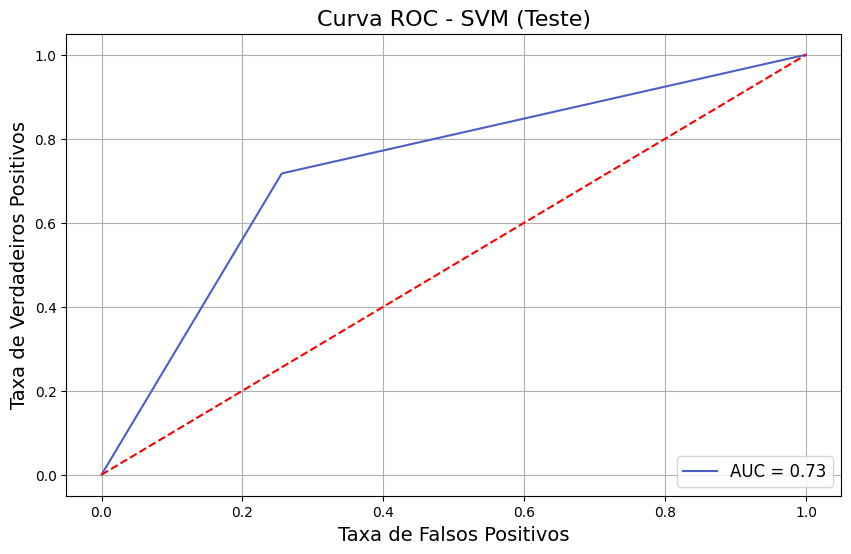

In [34]:
criar_auc_roc(y_test, test_svm_y_pred, 'SVM', 'Teste') 

Os resultados para o modelo SVM foram parecidos com o modelo de regressão logística: as mesmas métricas de treino, mas com alguns erros a mais de acordo com a matriz de confusão, além da mesma curva ROC e AUC, bem como o "cross validation" igual. A diferença ocorre em relação as métricas de teste no recall de ambas as categorias, onde se ve que, diferente do modelo de regressão logística, o recall da classe '1' é maior em 0.01, indo para 0.72, porém o da classe '0' é menor, indo para 0.74. Comparando também a matriz de confusão das bases de teste dos modelos, percebe-se ainda mais claramente a distinção entre ambas, onde a diferença entre a quantidade de previsões corretas e incorretas para as classe é menor, o que torna desse modelo, o modelo mais balanceado em relação as possíveis classificações a serem obtidas.

### Quarta Avaliação: XGBoost

#### Treino

In [35]:
relatorio_xgboost_train = classification_report(y_train, train_xgboost_y_pred)
cross_validation_xgboost_train = grid_search_xgboost.best_score_

print(f'\nRelatório:\n{relatorio_xgboost_train}')
print(f'\nCross Validation: {cross_validation_xgboost_train:.2f}')

criar_matriz_confusao(y_train, train_xgboost_y_pred, 'XGBoost', 'Treino') 


Relatório:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      3749
           1       0.74      0.74      0.74      3660

    accuracy                           0.75      7409
   macro avg       0.75      0.75      0.75      7409
weighted avg       0.75      0.75      0.75      7409


Cross Validation: 0.73


#### Teste

In [36]:
relatorio_xgboost_test = classification_report(y_test, test_xgboost_y_pred)
cross_validation_xgboost_test = grid_search_xgboost.best_score_

print(f'\nRelatório:\n{relatorio_xgboost_test}')
print(f'\nCross Validation: {cross_validation_xgboost_test:.2f}')

criar_matriz_confusao(y_test, test_xgboost_y_pred, 'XGBoost', 'Teste') 


Relatório:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1200
           1       0.75      0.71      0.73      1270

    accuracy                           0.73      2470
   macro avg       0.73      0.73      0.73      2470
weighted avg       0.73      0.73      0.73      2470


Cross Validation: 0.73


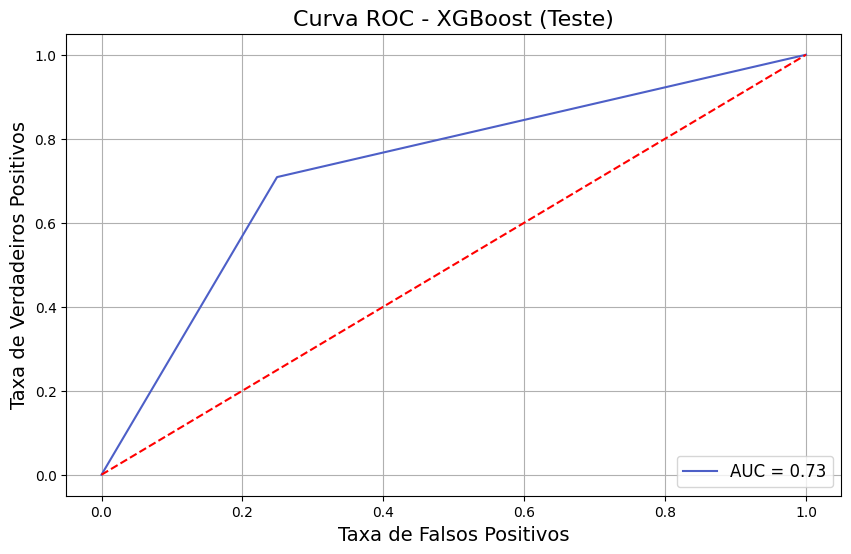

In [37]:
criar_auc_roc(y_test, test_xgboost_y_pred, 'XGBoost', 'Teste') 

Por último, no modelo de XGBoost, percebe-se que os resultados de treino foram os melhores, com 0.75 para as métricas de classe '0' no relatório de classificação e 0.74 para os de classe '1'. Contudo, o relatório de classificação da base de teste revela que o modelo foi menos capaz em realizar previsões ao se deparar com dados novos, obtendo os mesmo resultados das previsões de teste do modelo de regressão logística, com a mesma validação cruzada e curva ROC e AUC. Aqui, contudo, percebe-se através da matriz de confusão de teste que o modelo acertou a mesma quantidade de casos para as duas classes do que em relação ao primeiro modelo, porém ainda há uma diferença clara entre a quantidade de erros. Assim, de certa maneira, esse modelo apresentou uma capacidade mais balanceada de identificar corretamente os casos do que nos outros, até mesmo se for analisado a matriz de confusão da base de treino, que também evidencia esse equilíbrio.

# Conclusão

De maneira geral, os resultados de teste de todos os modelos apresentados foram extremamente semelhantes. Ainda assim, percebe-se que o modelo de Random Forest teve certa dificuldade de se adaptar a dados novos, o que leva a conclusão que esse é o menos confiável entre os algoritmos apresentados. Além disso, é interessante perceber que, apesar de a matriz de confusão apresentar que quantidades diferentes de erros e acertos para cada classe, os modelos de regressão logística e XGBoost apresentaram um relatório de classificação idêntico, com uma diferença de previsões corretas entre cada classe sendo mínima, enquanto o SVM mostrou o maior equilíbrio entre as taxas de acerto e erros nos resultados finais. Com isso, é possível afirmar que esses 3 modelos são boas opções para serem aplicados de maneira oficial: a regressão logística apresentou um desempenho tão bom quanto outros modelos mais robustos, mesmo sendo mais simples, o que a faz ser ideal para obter bons resultados mais rapidamente, sem a necessidade de um grande poder computacional, o XGBoost, por sua vez, é mais lento, mas sua maior resistência a "outliers" e "overfitting" podem resultar em menos problemas futuros com novas amostras de dados, constantemente atualizadas, do que com modelos mais simples, com uma maior facilidade de adaptação. Por fim, o SVM é mais complexo e de difícil interpretação, mas aparentou ter uma maior consistência de uma maneira geral, o que o tornaria ideal para cenários em que a capacidade de previsão do modelo de forma ampla é o mais importante. Com isso, esses resultados finais permitem que a escolha possa ser feita de acordo com as condições em que os modelos seriam aplicados e, por tanto, varia de acordo com a demanda, o que permite que a manutenção e melhora dos algoritmos possas ser feitas de maneira mais específica para cada caso.

Como o objetivo é identificar corretamente o time vencedor, seja lá qual seja, o modelo de SVM é o mais adequado e seria a escolha ideal. Ainda assim, as capacidades gerais de todos os modelos ainda deixam a desejar, o que permite a conclusão de que, para maior certeza sobre o resultado de cada partida, seria necessário maiores detalhes sobre os jogadores de cada equipe, como suas classes e outros dados estatísticos. Além disso, apesar da criação de novas variáveis através das informações originais da base de dados, é possível que a criação de outras informações possa ser feita para melhorar as previsões ou até, de maneira inversa, o uso apenas das variáveis de maior importância para os modelos apresentados, sendo necessário o desenvolvimento contínuo do projeto, mesmo após essa conclusão inicial. 